<a href="https://colab.research.google.com/github/Be-B/main-project/blob/main/4%E1%84%8C%E1%85%A1%E1%86%BC_LinearRegression_%E1%84%8C%E1%85%AE%E1%84%90%E1%85%A2%E1%86%A8%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_%EC%8B%A4%EC%8A%B5%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석 (1) 주택가격 회귀 분석

In [ ]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기
import warnings

warnings.filterwarnings(action='ignore')

### - 머신러닝 패키지 sklearn 설치

In [ ]:
# 데이터의 문제가 있어서 버전 다운
!pip uninstall scikit-learn==1.2
!pip install scikit-learn==1.1.3

Found existing installation: scikit-learn 1.1.3
Uninstalling scikit-learn-1.1.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.1.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.1.3
  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


## 1) 데이터 수집

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston =  load_boston()


## 2) 데이터 준비 및 탐색

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

데이터 분석

* CRIM: 지역별 범죄 발생률
* ZN: 25,000평방피트를 초과하는 거주 지역 비율
* INDUS: 비상업 지역의 넓이 비율
* CHAS: 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 주택 비율
* DIS: 5개 주요 고용센터까지 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세 비율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* PRICE(MEDV): 본인 소유 주택 가격의 중앙값



In [ ]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (506, 14)


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 3) 분석 모델 구축

## 4) 결과 분석 및 시각화

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757



선형 회귀는 y= ax + b의 식을 기본으로 함
* 올바른 선을 그리기 위해 기울기 ax, 절편 b를 알아야함
*  sklearn 모델은 학습한 값들을 저장할 때 다른 속성과의 구분을 위해 _ 를 추가함
  * coef_ : 기울기
  * intercept_ : 절편



In [ ]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1)) # Error sum of Squares

Y 절편 값:  40.995595172164485
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns) # x columns의 회귀계수 정렬
coef.sort_values(ascending = False) # 내림차순

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

## - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

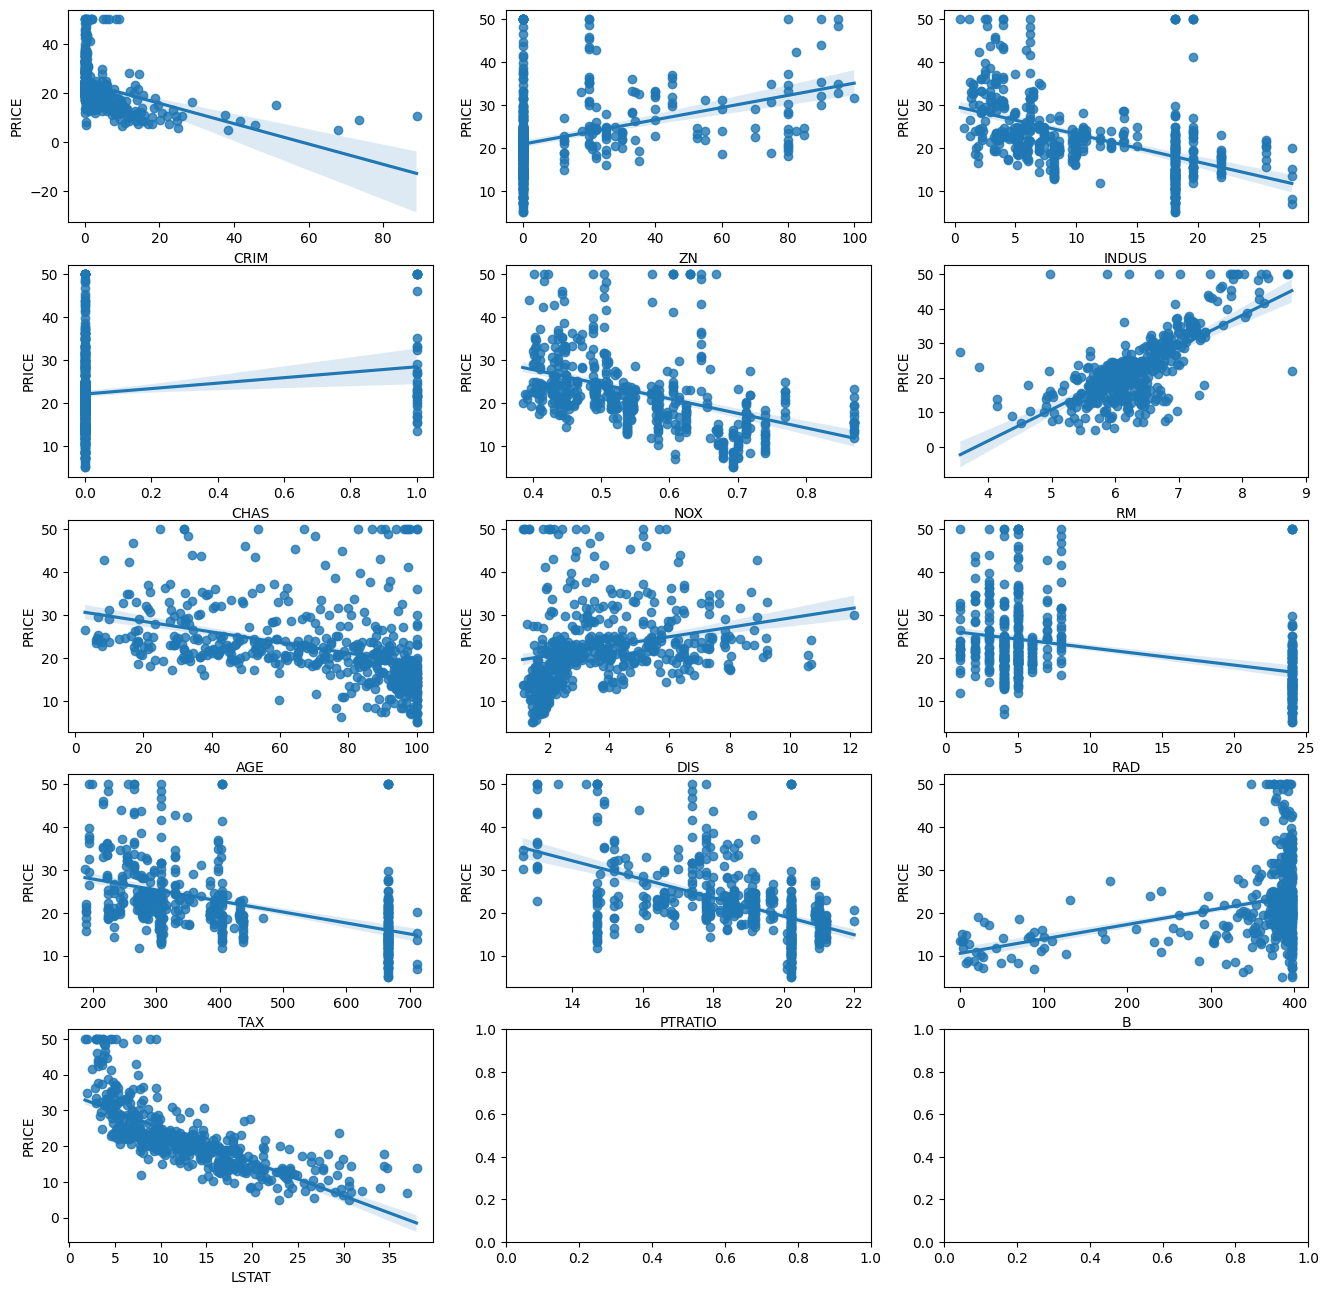

In [ ]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])